# Opdracht

## introduction

De opdracht is om een dataset te kiezen (zie opties hierbeneden) en daarop een KNN of RANDOM FOREST algoritme er op zetten.
- Speed dating experiment 
- Gender recognition of voice
- fifa 18
- employee attrition

Hierbij heb ik de Speed dating experiment dataset gekozen, omdat die bovenaan stond.
In deze dataset moeten we de DEC_O (descicion by partner) voorspellen

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split #We need this to split the data
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
print(df)

      iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...  attr3_3  sinc3_3  intel3_3  

Gekozen onderwerpen: age_o, Race_o, attr_o, sinc_o, intel_o, fun_o, amb_o

## Datacleaning

Aangezien we niet alle kolommen nodig hebben maken we een aparte subset met de waarden die we nodig hebben

In [15]:
df2 = df[['age_o', 'race_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o','amb_o', 'dec_o']]
df2

,age_o,race_o,attr_o,sinc_o,intel_o,fun_o,amb_o,dec_o
0,27.0,2.0,6.0,8.0,8.0,8.0,8.0,0
1,22.0,2.0,7.0,8.0,10.0,7.0,7.0,0
2,22.0,4.0,10.0,10.0,10.0,10.0,10.0,1
3,23.0,2.0,7.0,8.0,9.0,8.0,9.0,1
4,24.0,3.0,8.0,7.0,9.0,6.0,9.0,1
...,...,...,...,...,...,...,...,...
8373,26.0,3.0,10.0,5.0,3.0,2.0,6.0,1
8374,24.0,6.0,6.0,3.0,7.0,3.0,7.0,0
8375,29.0,3.0,2.0,1.0,2.0,2.0,2.0,0
8376,22.0,4.0,5.0,7.0,5.0,5.0,3.0,1


Nu gaan we eventuele NAN waardes weghalen

In [16]:
df2 = df2.dropna()
df2

,age_o,race_o,attr_o,sinc_o,intel_o,fun_o,amb_o,dec_o
0,27.0,2.0,6.0,8.0,8.0,8.0,8.0,0
1,22.0,2.0,7.0,8.0,10.0,7.0,7.0,0
2,22.0,4.0,10.0,10.0,10.0,10.0,10.0,1
3,23.0,2.0,7.0,8.0,9.0,8.0,9.0,1
4,24.0,3.0,8.0,7.0,9.0,6.0,9.0,1
...,...,...,...,...,...,...,...,...
8373,26.0,3.0,10.0,5.0,3.0,2.0,6.0,1
8374,24.0,6.0,6.0,3.0,7.0,3.0,7.0,0
8375,29.0,3.0,2.0,1.0,2.0,2.0,2.0,0
8376,22.0,4.0,5.0,7.0,5.0,5.0,3.0,1


## exploratory data analysis

We gaan kijken welke onderwerpen de beste correletie met elkaar hebben

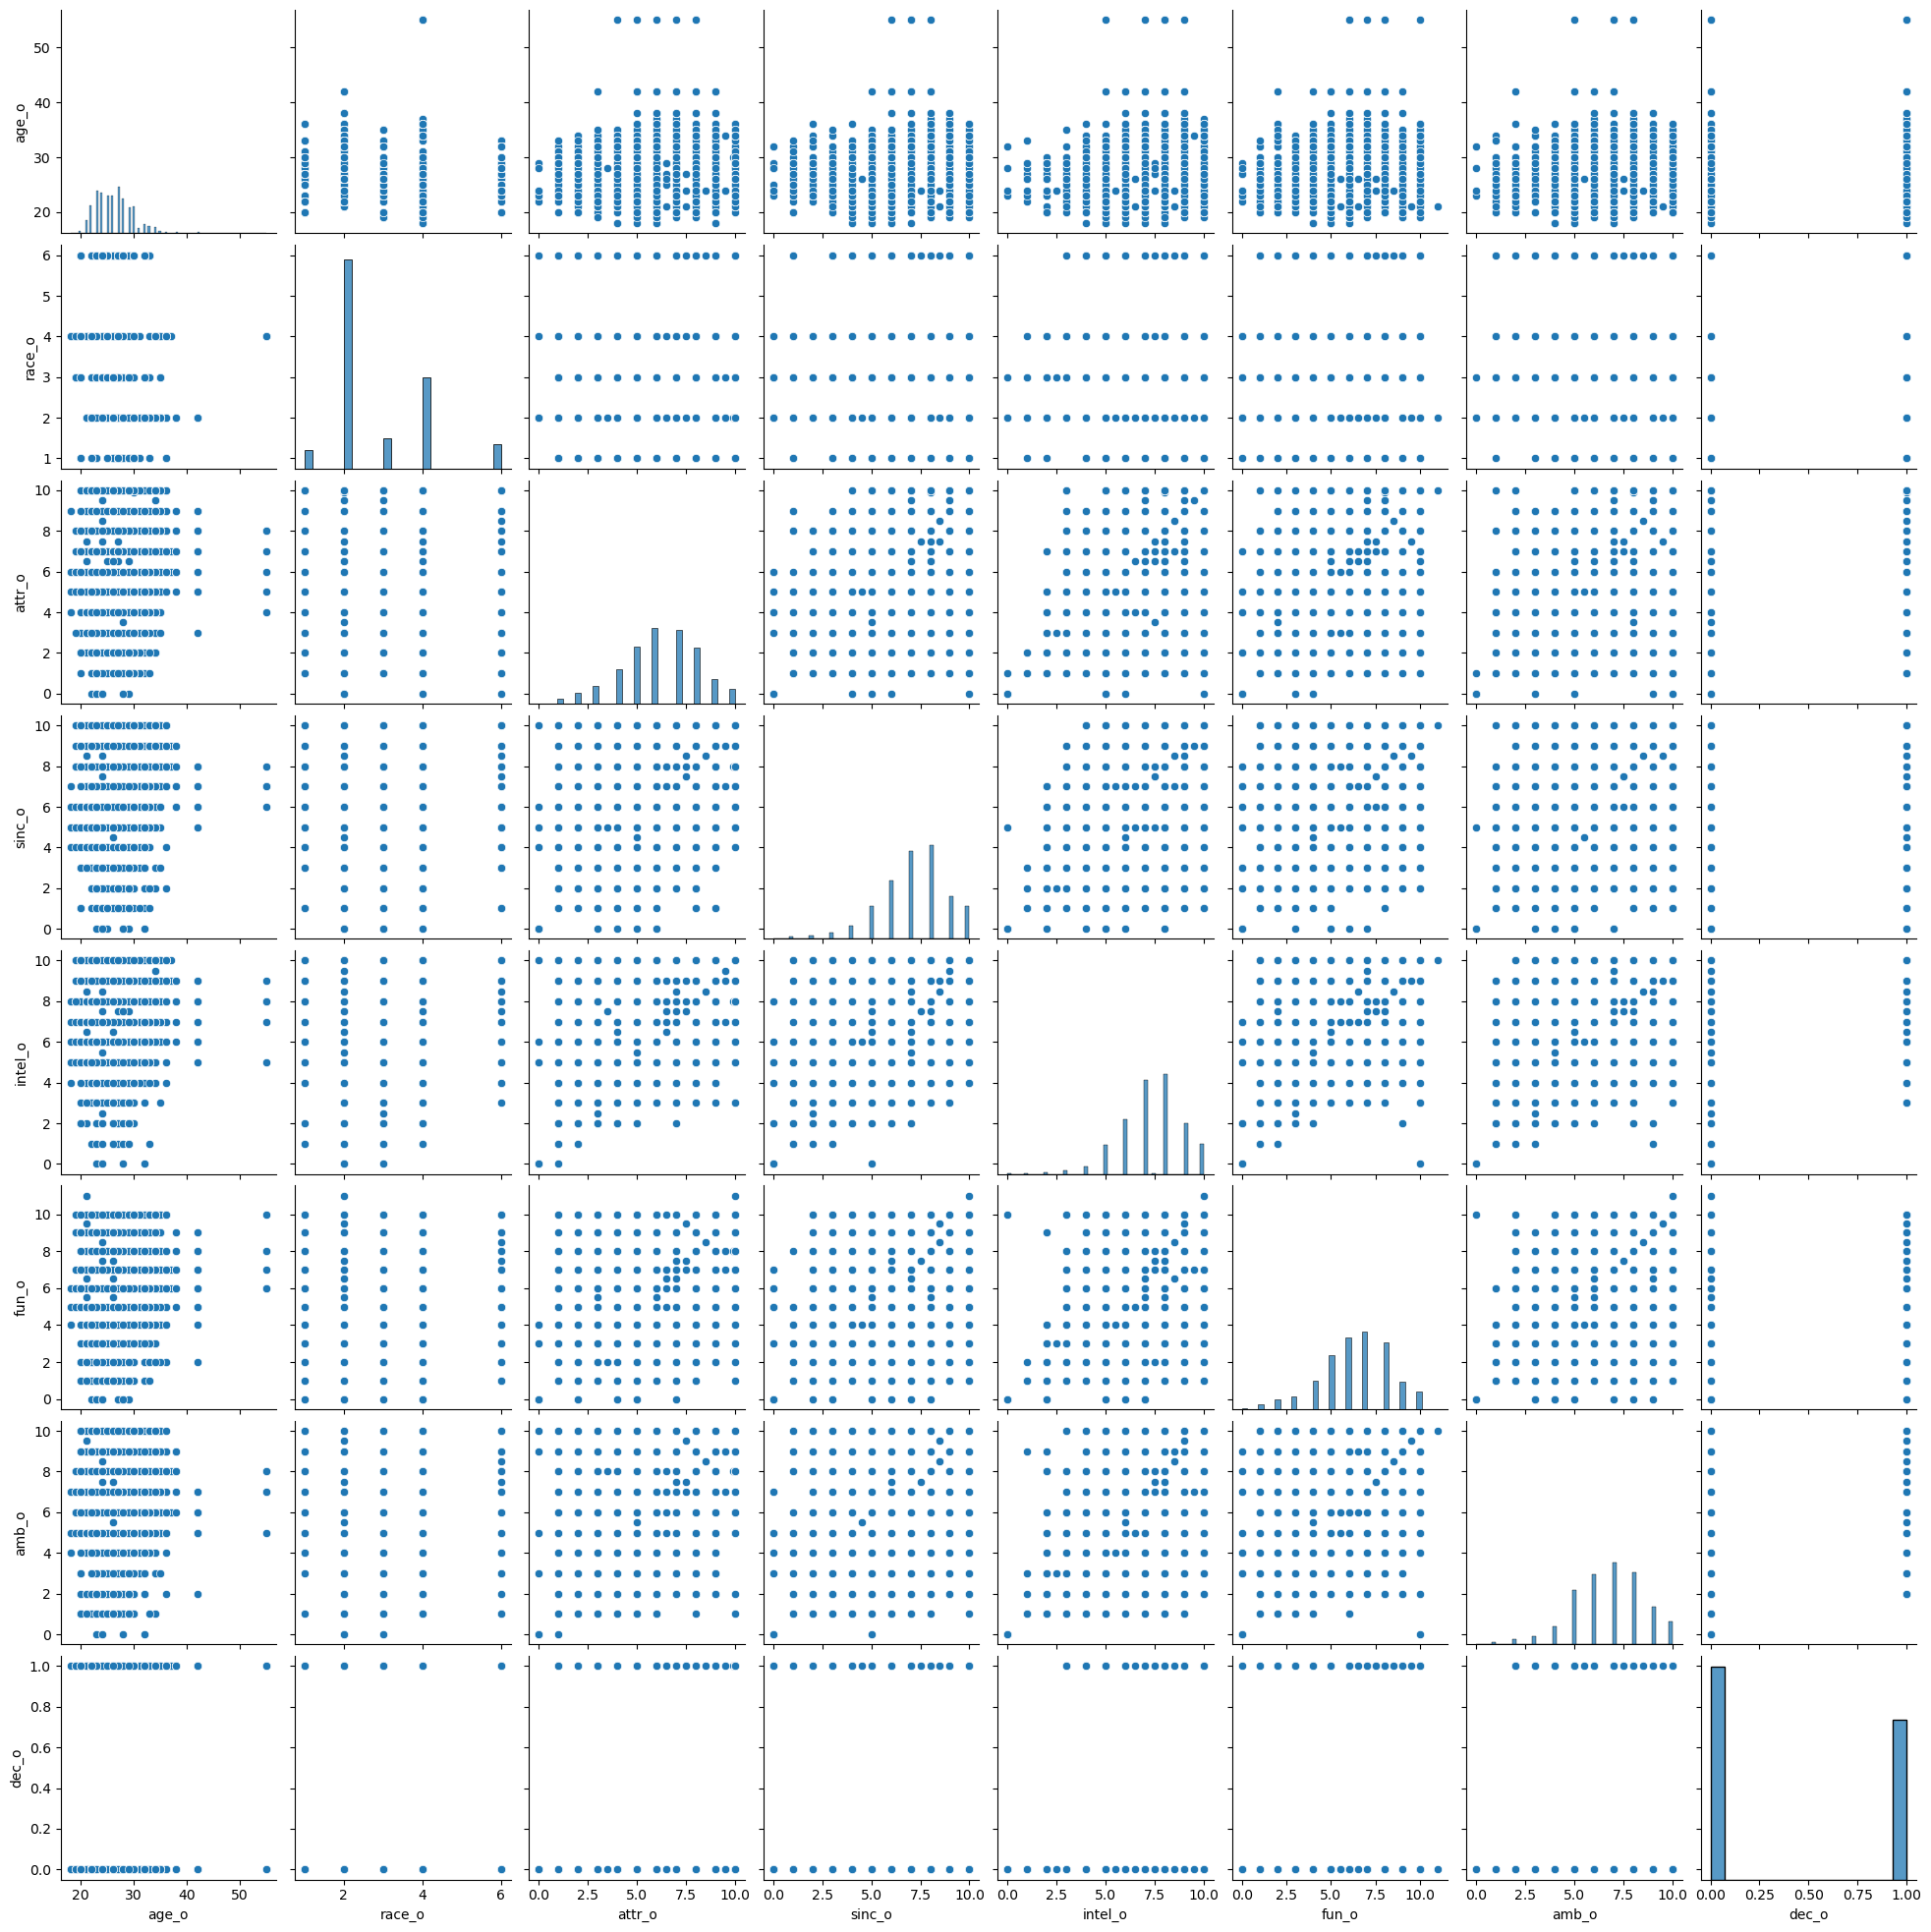

In [17]:
sns.pairplot(df2[[ 'age_o', 'race_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o','amb_o', 'dec_o']])
plt.show()

Uit de grafieken is het wat lastig om eventuele correllaties te vinden tussen de kollommen.
hiervoor zet ik het in een tabel form met behulp van de functie .corr()

In [18]:
corr = df2[[ 'age_o', 'race_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o','amb_o', 'dec_o']].corr()
corr

,age_o,race_o,attr_o,sinc_o,intel_o,fun_o,amb_o,dec_o
age_o,1.000000,-0.052352,0.023806,-0.005668,-0.009980,-0.005616,-0.027060,0.009473
race_o,-0.052352,1.000000,-0.009275,-0.049293,-0.068125,-0.017876,-0.067243,0.050032
attr_o,0.023806,-0.009275,1.000000,0.402061,0.389294,0.582935,0.361812,0.485120
sinc_o,-0.005668,-0.049293,0.402061,1.000000,0.658769,0.498228,0.458542,0.206898
intel_o,-0.009980,-0.068125,0.389294,0.658769,1.000000,0.496892,0.628837,0.215520
fun_o,-0.005616,-0.017876,0.582935,0.498228,0.496892,1.000000,0.491764,0.409075
amb_o,-0.027060,-0.067243,0.361812,0.458542,0.628837,0.491764,1.000000,0.186699
dec_o,0.009473,0.050032,0.485120,0.206898,0.215520,0.409075,0.186699,1.000000


Uit de tabel is te zien dat de sterkste correlatie met de kolom "dec_o" is de kolom "attr_o" met een waarde van 0.48
Over alle kolommen hebben "sinc_o" en "intel_o" de sterkste correlatie met namelijk een  afgeronde waarde van 0.66

## predictive model

Heb gekozen voor KNN
KNN staat voor K nearest neighbour.
knn is een algoritme dat kijkt naar welp punten (buren) het dichtbijst zitten met het nieuwe onbekende punt. Aan de hand van dit kan het algoritme bepalen bij welke cluster het nieuwe punt hoort

In [19]:
X = df2[['age_o', 'race_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o','amb_o']] #create the X matrix

y = df2['dec_o'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables\

X_train.head()


,age_o,race_o,attr_o,sinc_o,intel_o,fun_o,amb_o
6906,23.0,2.0,7.0,8.0,8.0,7.0,7.0
5987,27.0,2.0,8.0,8.0,8.0,9.0,10.0
7765,24.0,6.0,5.0,5.0,7.0,5.0,5.0
6648,29.0,4.0,6.0,6.0,5.0,6.0,5.0
6907,30.0,2.0,9.0,7.0,7.0,8.0,6.0


In [20]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier() #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train)


## Evalutation

### accuracy

In [21]:
knn.score(X_test, y_test)

0.7181088314005353

Accuracy is 71.8%. 

Om de "precision + Recall" te berekenen moeten we eerst een confusion matrix maken

In [22]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[971, 281],
       [351, 639]], dtype=int64)

In [23]:
conf_matrix = pd.DataFrame(cm, index=['chosen (actual)', 'not chosen (actual)'], columns = ['Chosen (predicted)', 'Not chosen (predicted)']) 
conf_matrix

,Chosen (predicted),Not chosen (predicted)
chosen (actual),971,281
not chosen (actual),351,639


### Precision

(971 + 281)/ (971 + 281 + 351 + 639) = 55.8%

### Recall (chosen)

971 / (971 + 281) = 0.78 --> 78%


## Conclusion


Uit de berekeningen hierboven is te zien dat de recall hoger is dan de accuracy, maar de precisie is niet hoger dan de accuracy

Het programma is beter in het voorspellen welke koppels voor elkaar gekozen hebben, maar het is nog niet nauwkeurig